In [145]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math 

In [146]:
#importing the data adding a total event coluumn which sums events 1-5 and then sorting in descending order
df = pd.read_csv('C:\\Users\\lukag\\Desktop\\kaden\\Data Analyst Test\\DataAnalystReport.csv',engine = 'python')
events = ['event_1_count','event_2_count','event_3_count','event_4_count','event_5_count']
df['Event Sum'] = df[events].sum(axis=1)
df = df.sort_values(by=['Event Sum'],ascending = False).reset_index()
df.head()

,index,App Name,Bundle,Creative ID,Hardware,Software,Wins,Win Rate,Cost,Clicks,...,event_1_count,event_2_count,event_3_count,event_4_count,event_5_count,Average Bid,eCPMp,eCPCp,eCPIp,Event Sum
0,315632,ibis Paint X iOS,450722833,502183,Apple iPhone,iOS 14,6957,49.7035,13.023824,52,...,0,26,0,0,0,2.009096,1.872046,0.250458,0.434127,26
1,315618,ibis Paint X iOS,450722833,502180,Apple iPhone,iOS 14,6598,49.5420,12.297489,31,...,0,26,0,0,0,2.004706,1.863821,0.396693,0.512395,26
2,315639,ibis Paint X iOS,450722833,502210,Apple iPhone,iOS 14,5113,50.0833,9.568157,25,...,0,22,0,0,0,2.002655,1.871339,0.382726,0.455627,22
3,315657,ibis Paint X iOS,450722833,502213,Apple iPhone,iOS 14,4736,54.2435,8.864299,30,...,0,20,0,0,0,1.994614,1.871685,0.295477,0.521429,20
4,315700,ibis Paint X iOS,450722833,505644,Apple iPhone,iOS 14,5409,51.9247,9.926883,35,...,0,20,0,0,0,1.972680,1.835253,0.283625,0.472709,20


In [147]:
#Quick statistical Overveiw of each of the columns 
df.describe()

,index,Creative ID,Wins,Win Rate,Cost,Clicks,Conversions,Click Rate,event_1_count,event_2_count,event_3_count,event_4_count,event_5_count,Average Bid,eCPMp,eCPCp,eCPIp,Event Sum
count,323823.000000,323823.000000,323823.000000,323823.000000,323823.000000,323823.000000,323823.000000,323823.000000,323823.0,323823.000000,323823.0,323823.000000,323823.000000,323823.000000,323823.000000,323823.000000,323823.000000,323823.000000
mean,161911.000000,503046.460591,11.032249,10.122337,0.009543,0.017593,0.006565,0.088781,0.0,0.006695,0.0,0.000225,0.000006,1.189902,0.288414,0.001729,0.001921,0.006927
std,93479.792447,1001.488317,254.384219,25.363956,0.233369,0.410099,0.208846,2.332849,0.0,0.219146,0.0,0.016200,0.002485,0.777646,0.521743,0.040584,0.065200,0.225315
min,0.000000,502167.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80955.500000,502183.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.736377,0.000000,0.000000,0.000000,0.000000
50%,161911.000000,503107.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.972500,0.000000,0.000000,0.000000,0.000000
75%,242866.500000,504005.000000,1.000000,1.717900,0.000734,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.263852,0.552000,0.000000,0.000000,0.000000
max,323822.000000,505644.000000,21744.000000,133.333300,23.898793,52.000000,30.000000,100.000000,0.0,26.000000,0.0,2.000000,1.000000,4.966000,6.204000,5.032749,9.546203,26.000000


In [148]:
#Grouping By app name and software then summing the events 
df2 = df.groupby(['Creative ID','App Name','Software'])['Event Sum'].sum().reset_index()
df2.head()

,Creative ID,App Name,Software,Event Sum
0,502167,353263352,iOS 12,0
1,502167,353263352,iOS 13,0
2,502167,353263352,iOS 14,0
3,502167,521633042,iOS 11,0
4,502167,521633042,iOS 12,0


There are 148335 Creative IDs
The average Event Sum is:  0.015121178413725688
There are 147657 Creative IDs that have no post install events
0.457073516027906 % of Creative IDS result in a post install event


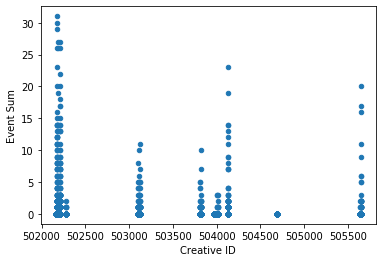

In [149]:
#Extracting relevant info and plotting Events vs Creative ID
dfmean = df2["Event Sum"].mean()
zeroevent = (df2['Event Sum']==0).sum()

print('There are',len(df2.index),'Creative IDs')
print('The average Event Sum is: ',dfmean)
print('There are',zeroevent, 'Creative IDs that have no post install events')
print((100*(1-(zeroevent/len(df2.index)))),"% of Creative IDS result in a post install event")
df2.plot.scatter(x="Creative ID",y="Event Sum")

There are 46 Unique Creative IDs
The average Event Sum is:  48.76086956521739
There are 14 Creative IDs that have no post install events
69.56521739130434 % of Creative IDS result in a post install event


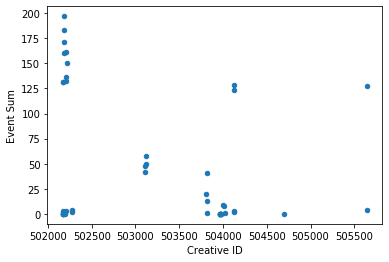

In [150]:
#Same as above just with only Creative ID no software and App name 
df3 = df.groupby(['Creative ID'])['Event Sum'].sum().reset_index()


dfmean1 = df3["Event Sum"].mean()
zeroevent1 = (df3['Event Sum']==0).sum()

print('There are',len(df3.index),'Unique Creative IDs')
print('The average Event Sum is: ',dfmean1)
print('There are',zeroevent1, 'Creative IDs that have no post install events')
print((100*(1-(zeroevent1/len(df3.index)))),"% of Creative IDS result in a post install event")
df3.plot.scatter(x="Creative ID",y="Event Sum")

In [151]:
df4 = df.groupby(['Creative ID'])['event_1_count','event_2_count','event_3_count','event_4_count','event_5_count','Event Sum'].sum().reset_index()
df4.head()

,Creative ID,event_1_count,event_2_count,event_3_count,event_4_count,event_5_count,Event Sum
0,502167,0,0,0,0,0,0
1,502168,0,0,0,0,0,0
2,502170,0,0,0,0,0,0
3,502171,0,3,0,0,0,3
4,502173,0,1,0,0,0,1


True


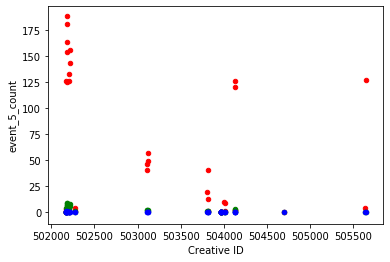

In [152]:
#plotting the event counts vs the creative IDS Red is 2 Green is 4 and Blue is 5 
ax1 = df4.plot(kind='scatter', x='Creative ID', y='event_2_count', color='r')    
ax2 = df4.plot(kind='scatter', x='Creative ID', y='event_4_count', color='g', ax=ax1)    
ax3 = df4.plot(kind='scatter', x='Creative ID', y='event_5_count', color='b', ax=ax1)

print(ax1 == ax2 == ax3) 